In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt 
import time, math

In [2]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
ratings_df = pd.read_csv("D:/clg/movie1.csv.data", sep='\t', names=names)


In [3]:
ratings_df

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596
...,...,...,...,...
99995,880,476,3,880175444
99996,716,204,5,879795543
99997,276,1090,1,874795795
99998,13,225,2,882399156


In [4]:
ratings_df.describe

<bound method NDFrame.describe of        user_id  item_id  rating  timestamp
0          196      242       3  881250949
1          186      302       3  891717742
2           22      377       1  878887116
3          244       51       2  880606923
4          166      346       1  886397596
...        ...      ...     ...        ...
99995      880      476       3  880175444
99996      716      204       5  879795543
99997      276     1090       1  874795795
99998       13      225       2  882399156
99999       12      203       3  879959583

[100000 rows x 4 columns]>

In [5]:
item_info = pd.read_csv("D:/clg/movie2.item", sep='|', header=None, usecols=[1],encoding='latin-1')   # Information about the items (keeps only movie's name)
item_info.columns = ['title']

In [6]:
item_info

,title
0,Toy Story (1995)
1,GoldenEye (1995)
2,Four Rooms (1995)
3,Get Shorty (1995)
4,Copycat (1995)
...,...
1677,Mat' i syn (1997)
1678,B. Monkey (1998)
1679,Sliding Doors (1998)
1680,You So Crazy (1994)


In [7]:
ratings_df.head()

,user_id,item_id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [8]:
n_users = len(ratings_df['user_id'].unique())
n_items = len(ratings_df['item_id'].unique())
R_shape = (n_users, n_items)
print(str(n_users),' users')
print(str(n_items), ' items')

943  users
1682  items


In [9]:
ratings_df['rating'].describe()


count    100000.000000
mean          3.529860
std           1.125674
min           1.000000
25%           3.000000
50%           4.000000
75%           4.000000
max           5.000000
Name: rating, dtype: float64

# visualization

Text(0.5, 1.0, 'Distribution of ratings')

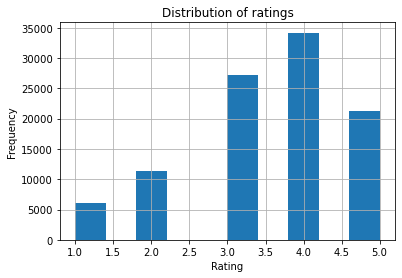

In [10]:
ratings_df['rating'].hist(grid=True)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Distribution of ratings')


Text(0.5, 1.0, 'Distribution of normalized ratings')

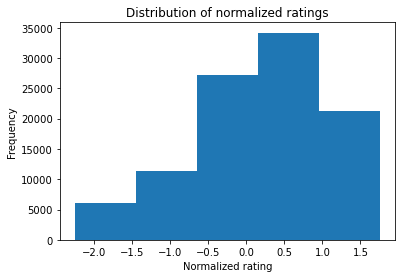

In [11]:
from sklearn.preprocessing import scale
binwidth = 0.8
data = scale(ratings_df['rating'].astype(float))
plt.hist(data, bins=np.arange(min(data), max(data) + binwidth, binwidth))    # Z-score normalization
plt.xlabel('Normalized rating')
plt.ylabel('Frequency')
plt.title('Distribution of normalized ratings')


In [12]:
#R

# COMPREHENSIVE DATA VISUALIZATION 

In [13]:
rating_df= pd.read_csv("D:/clg/movie1.csv.data", sep="\t", names=["user_id", "item_id", "rating", "timestamp"])

item_df = pd.read_csv("D:/clg/movie2.item", sep="|",encoding="latin-1", 
                      names=["movie_id", "movie_title", "release_date", "video_release_date",
                             "imbd_url", "unknown", "action", "adventure", "animation",
                             "childrens", "comedy", "crime", "documentary", "drama", "fantasy", 
                             "film_noir", "horror", "musical", "mystery", "romance", 
                             "sci-fi", "thriller", "war", "western"])

user_df = pd.read_csv("D:/clg/u.user", sep="|", encoding="latin-1", names=["user_id", "age", "gender",
                                                                            "occupation", "zip_code"])

In [14]:
full_df = pd.merge(user_df, rating_df, how="left", on="user_id")
full_df = pd.merge(full_df, item_df, how="left", right_on="movie_id", left_on="item_id")
full_df.head()

,user_id,age,gender,occupation,zip_code,item_id,rating,timestamp,movie_id,movie_title,...,fantasy,film_noir,horror,musical,mystery,romance,sci-fi,thriller,war,western
0,1,24,M,technician,85711,61,4,878542420,61,Three Colors: White (1994),...,0,0,0,0,0,0,0,0,0,0
1,1,24,M,technician,85711,189,3,888732928,189,"Grand Day Out, A (1992)",...,0,0,0,0,0,0,0,0,0,0
2,1,24,M,technician,85711,33,4,878542699,33,Desperado (1995),...,0,0,0,0,0,1,0,1,0,0
3,1,24,M,technician,85711,160,4,875072547,160,Glengarry Glen Ross (1992),...,0,0,0,0,0,0,0,0,0,0
4,1,24,M,technician,85711,20,4,887431883,20,Angels and Insects (1995),...,0,0,0,0,0,1,0,0,0,0


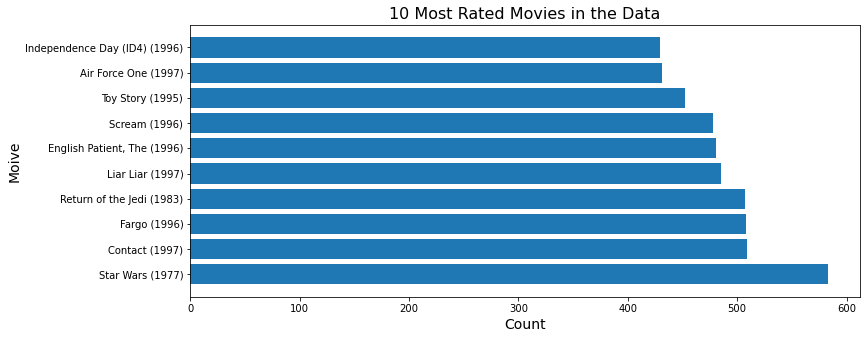

In [15]:
# return number of rows associated to each title
top_ten_movies = full_df.groupby("movie_title").size().sort_values(ascending=False)[:10]

# plot the counts
plt.figure(figsize=(12, 5))
plt.barh(y= top_ten_movies.index,
         width= top_ten_movies.values)
plt.title("10 Most Rated Movies in the Data", fontsize=16)
plt.ylabel("Moive", fontsize=14)
plt.xlabel("Count", fontsize=14)
plt.show()

Max movies rated by one user: 737
Min movies rated by one user: 20


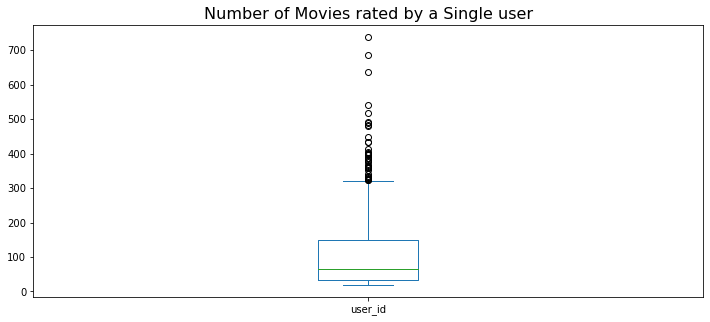

In [16]:
movies_rated = rating_df.groupby("user_id").size().sort_values(ascending=False)
print(f"Max movies rated by one user: {max(movies_rated)}\nMin movies rated by one user: {min(movies_rated)}")
rating_df.user_id.value_counts().plot.box(figsize=(12, 5))
plt.title("Number of Movies rated by a Single user", fontsize=16)
plt.show()


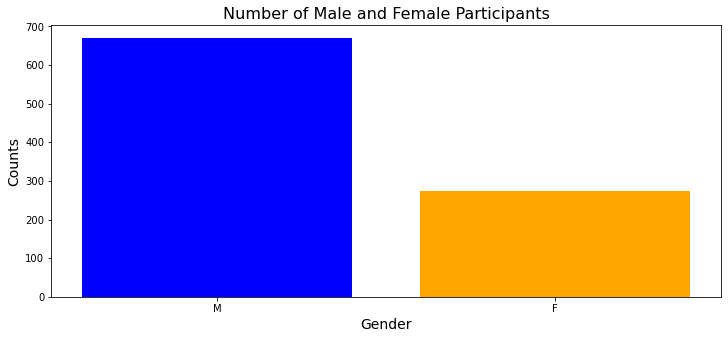

In [17]:
# count the number of male and female raters
gender_counts = user_df.gender.value_counts()

# plot the counts 
plt.figure(figsize=(12, 5))
plt.bar(x= gender_counts.index[0], height=gender_counts.values[0], color="blue")
plt.bar(x= gender_counts.index[1], height=gender_counts.values[1], color="orange")
plt.title("Number of Male and Female Participants", fontsize=16)
plt.xlabel("Gender", fontsize=14)
plt.ylabel("Counts", fontsize=14)
plt.show()

array([[<AxesSubplot:title={'center':'rating'}>]], dtype=object)

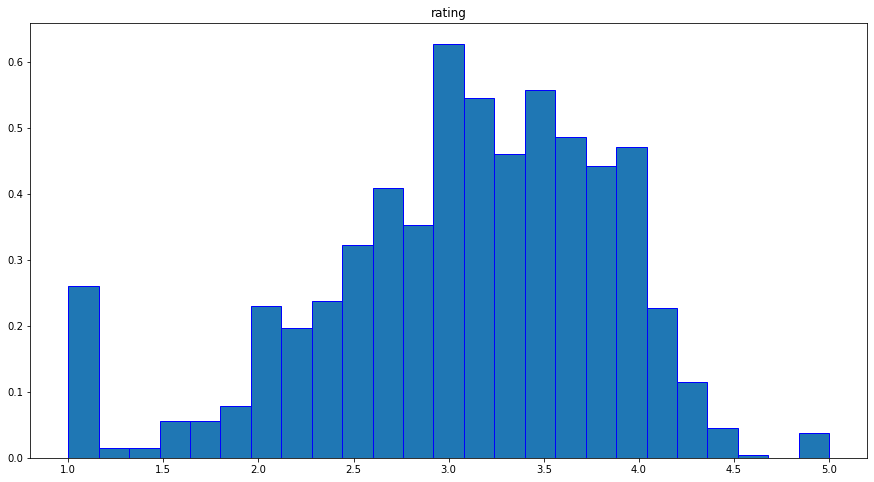

In [18]:
df_temp = full_df[['movie_id','rating']].groupby('movie_id').mean()

df_temp.hist(bins=25, grid=False, edgecolor='b', density=True, label ='Overall', figsize=(15,8))

In [19]:
X = ratings_df[['user_id', 'item_id']].values
y = ratings_df['rating'].values

print('X')
print (X)
print('y')
print (y)

X
[[ 196  242]
 [ 186  302]
 [  22  377]
 ...
 [ 276 1090]
 [  13  225]
 [  12  203]]
y
[3 3 1 ... 1 2 3]


In [20]:
from scipy import sparse


In [21]:
def ConvertToDense(X, y, shape):  # from R=(X,y), in sparse format 
    row  = X[:,0]
    col  = X[:,1]
    data = y
    matrix_sparse = sparse.csr_matrix((data,(row,col)), shape=(shape[0]+1,shape[1]+1))  # sparse matrix in compressed format (CSR)
    R = matrix_sparse.todense()   # convert sparse matrix to dense matrix, same as: matrix_sparse.A
    R = R[1:,1:]                  # removing the "Python starts at 0" offset
    R = np.asarray(R)             # convert matrix object to ndarray object
    return R

In [22]:
n_users = len(ratings_df['user_id'].unique())
n_items = len(ratings_df['item_id'].unique())
R_shape = (n_users, n_items)

In [23]:
R = ConvertToDense(X, y, R_shape)
print (R)
print (R.shape)

[[5 3 4 ... 0 0 0]
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [5 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 5 0 ... 0 0 0]]
(943, 1682)


In [24]:
print (R[1,0])

4


In [25]:
print(len(R.nonzero()[0]) / float(R.shape[0] * R.shape[1]))

0.06304669364224531


# start of recommender system

In [26]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=20)     # starts with 20 latents factors

# Matrix factorization               # V ~ W.H  (Find two non-negative matrices (W, H) whose product approximates the non- negative matrix X. )
nmf_model.fit(R)                     # R can be array-like or sparse, here it is array-like (dense)
Theta = nmf_model.transform(R)       # user latent factors (= W, called the features matrix)
M = nmf_model.components_.T          # item latent factors (= H.T) (H is called the coefficient matrix)

# Making the predictions
R_pred = M.dot(Theta.T)              # See http://stackoverflow.com/questions/24739121/nonnegative-matrix-factorization-in-sklearn
R_pred = R_pred.T                    # same dimensions as R

print('Item features - M:', M.shape)
print ('User features - Theta:', Theta.shape)
print ('R ~ M * Theta.T:')
print (R_pred.round(2))
print (R_pred.shape)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:289: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(
C:\Users\HP\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1637: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


Item features - M: (1682, 20)
User features - Theta: (943, 20)
R ~ M * Theta.T:
[[4.68 1.88 1.56 ... 0.   0.03 0.07]
 [2.65 0.   0.24 ... 0.02 0.   0.  ]
 [0.23 0.02 0.04 ... 0.01 0.   0.  ]
 ...
 [1.91 0.07 0.33 ... 0.   0.   0.  ]
 [1.69 0.05 0.   ... 0.01 0.   0.  ]
 [2.   2.28 1.7  ... 0.   0.04 0.07]]
(943, 1682)


In [27]:
def make_recommendation_activeuser(R, prediction, user_idx, k=5):
    '''
    user_idx ...... select an active user
    k  ............ number of movies to recommend
    '''
    rated_items_df_user = pd.DataFrame(R).iloc[user_idx, :]                 # get the list of actual ratings of user_idx (seen movies)
    user_prediction_df_user = pd.DataFrame(prediction).iloc[user_idx,:]     # get the list of predicted ratings of user_idx (unseen movies)
    reco_df = pd.concat([rated_items_df_user, user_prediction_df_user, item_info], axis=1)   # merge both lists with the movie's title
    reco_df.columns = ['rating','prediction','title']

    print ('Preferred movies for user #', user_idx)
    print (reco_df.sort_values(by='rating', ascending=False)[:k])             # returns the 5 seen movies with the best actual ratings
    print ('Recommended movies for user #', user_idx)
    reco_df = reco_df[ reco_df['rating'] == 0 ]
    print(reco_df.sort_values(by='prediction', ascending=False)[:k])         # returns the 5 unseen movies with the best predicted ratings



In [28]:
make_recommendation_activeuser(R, R_pred, user_idx=50, k=5)
make_recommendation_activeuser(R, R_pred, user_idx=56, k=5)
make_recommendation_activeuser(R, R_pred, user_idx=78, k=5)
make_recommendation_activeuser(R, R_pred, user_idx=69, k=5)
make_recommendation_activeuser(R, R_pred, user_idx=48, k=5)

Preferred movies for user # 50
     rating  prediction                            title
171       5    1.608836  Empire Strikes Back, The (1980)
180       5    2.600556        Return of the Jedi (1983)
172       5    1.182137       Princess Bride, The (1987)
49        5    3.202978                 Star Wars (1977)
143       5    0.855017                  Die Hard (1988)
Recommended movies for user # 50
     rating  prediction                             title
173       0    1.777313    Raiders of the Lost Ark (1981)
55        0    1.625887               Pulp Fiction (1994)
97        0    1.517399  Silence of the Lambs, The (1991)
11        0    1.327251        Usual Suspects, The (1995)
78        0    1.321109              Fugitive, The (1993)
Preferred movies for user # 56
     rating  prediction                             title
0         5    4.166097                  Toy Story (1995)
281       5    3.019120            Time to Kill, A (1996)
63        5    1.550261  Shawshank Redemp

# recommending items to the user



In [29]:
def make_recommendation_newuser(item_sim, item_idx, k=5):
    '''
    item_idx ...... select an item
    k  ............ number of movies to recommend
    '''
    reco_item_df = pd.DataFrame(item_sim).iloc[item_idx, :] 
    reco_item_df = pd.concat([reco_item_df, item_info], axis=1)   # merge list with the movie's title
    reco_item_df.columns = ['similarity','title']
    reco_item_df = reco_item_df.sort_values(by='similarity',ascending=False)

    print('Recommended movies for a new user (without rating history), currently looking at movie:', reco_item_df.iloc[0]['title'])
    print(reco_item_df[1:k+1])           # returns the 5 movies the most similar to item_idx

In [30]:
from sklearn.metrics.pairwise import cosine_similarity

In [31]:
item_sim = cosine_similarity(M)     

In [32]:
make_recommendation_newuser(item_sim, item_idx=1, k=5)
make_recommendation_newuser(item_sim, item_idx=69, k=5)
make_recommendation_newuser(item_sim, item_idx=500, k=5)

Recommended movies for a new user (without rating history), currently looking at movie: GoldenEye (1995)
     similarity                  title
577    0.973932  Demolition Man (1993)
575    0.972048     Cliffhanger (1993)
232    0.962780     Under Siege (1992)
801    0.959965     Hard Target (1993)
539    0.951877     Money Train (1995)
Recommended movies for a new user (without rating history), currently looking at movie: Four Weddings and a Funeral (1994)
     similarity                           title
25     0.878679   Brothers McMullen, The (1995)
215    0.875054  When Harry Met Sally... (1989)
380    0.856188         Muriel's Wedding (1994)
691    0.824561  American President, The (1995)
731    0.822315                     Dave (1993)
Recommended movies for a new user (without rating history), currently looking at movie: Dumbo (1941)
     similarity                                   title
98     0.993248  Snow White and the Seven Dwarfs (1937)
417    0.983978                      

In [50]:
pip install neo4j

  Using cached neo4j-5.8.0.tar.gz (187 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Installing backend dependencies: started
  Installing backend dependencies: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Created wheel for neo4j: filename=neo4j-5.8.0-py3-none-any.whl size=258422 sha256=f16d35bccd11ddfbfb83d11caf02f12b73ebc9453646808cf49870c34d2716ec
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\3e\ef\4c\a91599f59166356b3942580360be2362563a7a97c877d018ca
Successfully built neo4j
Note: you may need to restart the kernel to use updated packages.


In [51]:
from neo4j import GraphDatabase

In [52]:
driver = GraphDatabase.driver('bolt://54.85.184.243:7687',
                              auth=("neo4j", "arcs-steamers-aggravation"))

In [53]:
driver

In [54]:
c = '''
// Create constraints
// CREATE CONSTRAINT papers IF NOT EXISTS ON (m:movies) ASSERT m.id IS UNIQUE;
CREATE CONSTRAINT papers IF NOT EXISTS FOR (m:movies) REQUIRE m.id IS UNIQUE;
'''

gds.run_cypher(c)

c = '''
// Load node list
LOAD CSV WITH HEADERS FROM 'file ///user_data.csv'   AS row
MERGE (m:movies {id: line.id})
    ON CREATE SET m.subject = rate.is 
 p.features = line.features
RETURN COUNT(*)
'''

gds.run_cypher(c)

c = '''
// Load edge list
LOAD CSV WITH HEADERS FROM 'file ///rate.csv'   AS row
MATCH (source:Paper {id: rate.source})
MATCH (target:Paper {id: rate.target})
MERGE (source)-[:CITES]->(target)
RETURN COUNT(*)
'''

gds.run_cypher(c)

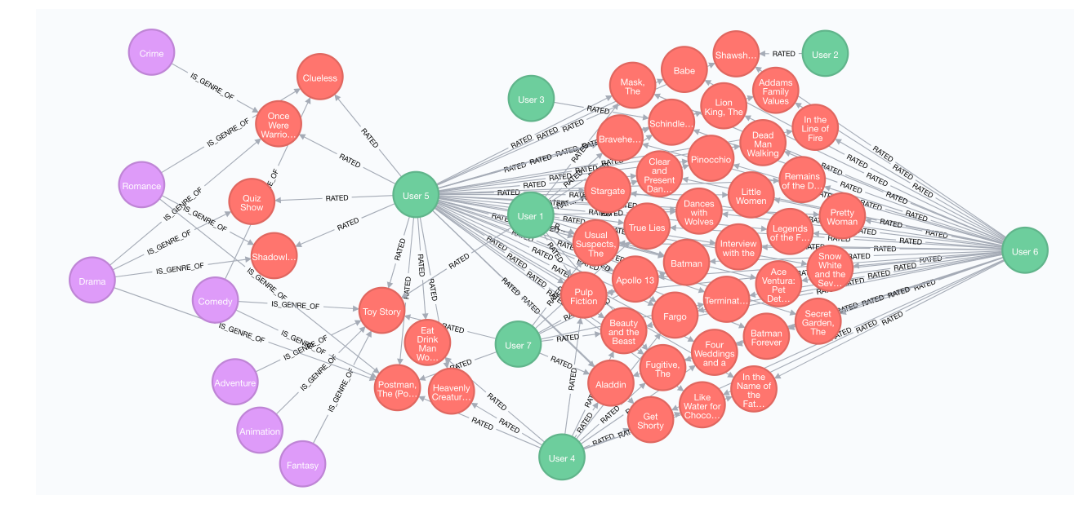

In [47]:
from yfiles_jupyter graph import GraphWifget
GraphWifget(graph=graph)
graph()

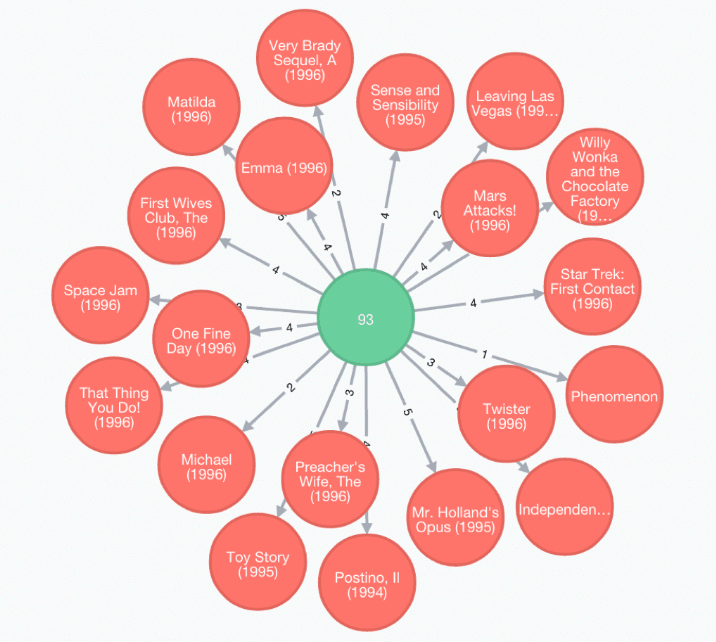

In [48]:
w.directed=False
w.set_graph_layout('orthogonal')
w.neighbour(3,[grapgh.node.get(0).id])
w.overview(False)
graph()